# **Analyzing Wildfire Activities in Australia**


---


# Objectives

Use visualization libraries such as Matplotlib, Pandas, Seaborn and Folium to create informative plots and charts 


---


# Setup


For this project, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Importing Required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
import io
#from js import fetch
%matplotlib inline

In [20]:
import warnings # To supress some warnings

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

---


# Dataset

**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

Variables

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations


---


### Importing Data


In [2]:
# from js import fetch
# import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
response = requests.get(URL)
response.raise_for_status()  # Check if the request was successful

# Read the CSV content into a Pandas DataFrame
df = pd.read_csv(io.StringIO(response.text))
print('Data read into a pandas dataframe!')


Data read into a pandas dataframe!


Let's look at some samples rows from the dataset we loaded:


In [3]:
# Replace infinity values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


---


Let's verify the column names and the data type of each variable


In [4]:
#Column names
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [5]:
#data type
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

Converting 'Date' from object to 'datatime' type. Also let's extract 'Year' and 'Month' from date and include in the dataframe as separate columns


In [6]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month


**Verify the columns again**


In [7]:
#verify the columns again
df.dtypes


Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

---


## Tasks


### TASK 1: 

Let's try to understand the change in average estimated fire area over time. I will group the year for 'Estimated_fire_area' (taking its mean). Then we create a line graph.


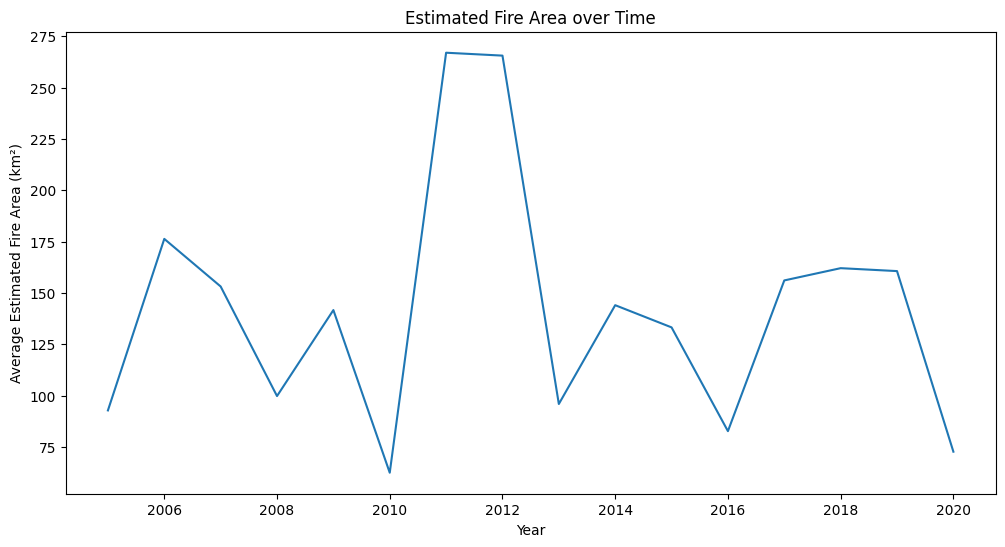

In [8]:
plt.figure(figsize=(12,6))
df_new = df.groupby('Year')['Estimated_fire_area'].mean()

df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')

plt.show()

---


### TASK 2: 

You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.


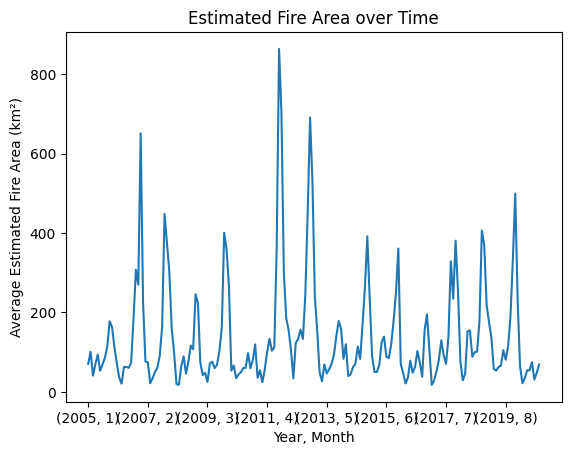

In [9]:
df_new = df.groupby(['Year', 'Month'])['Estimated_fire_area'].mean()

df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')

plt.show()

This plot represents that the estimated fire area was on its peak after 2011, April and before 2012. We can verify on google/news, this was the time of maximum wildfire hit in Austrailia


---


### TASK 3: 

Let's have an insight on the distribution of mean estimated fire brightness across the regions<br> use the functionality of seaborn to develop a barplot.

Before starting with the plot, why not know the regions mentioned in the dataset?. <br>We will make use of unique() to identify the regions in the dataset.


In [10]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

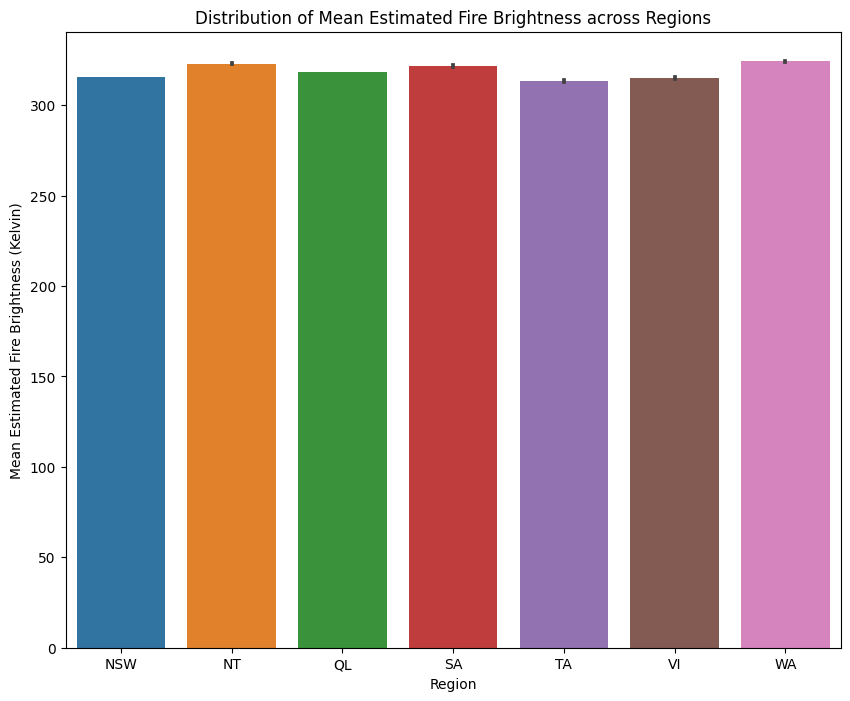

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

---


### TASK 4: 

Let's find the portion of count of pixels for presumed vegetation fires vary across regions and then we will develop a pie chart. First we will group the data on region and find the sum of the count.


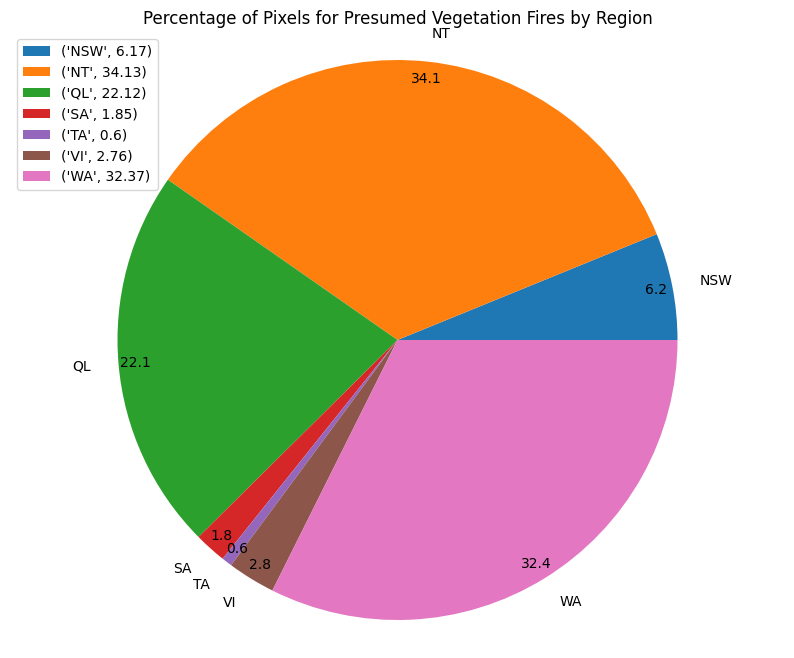

In [12]:
plt.figure(figsize=(10,8))
region_counts = df.groupby('Region')['Count'].sum()
plt.pie(region_counts, labels=region_counts.index, pctdistance=0.94, autopct='%1.1f')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')

# add legend
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)]) 
plt.show()

---


### TASK 5: 

Let's try to develop a histogram of the mean estimated fire brightness<br> Using Matplotlib to create the histogram


In [13]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'Year', 'Month'],
      dtype='object')

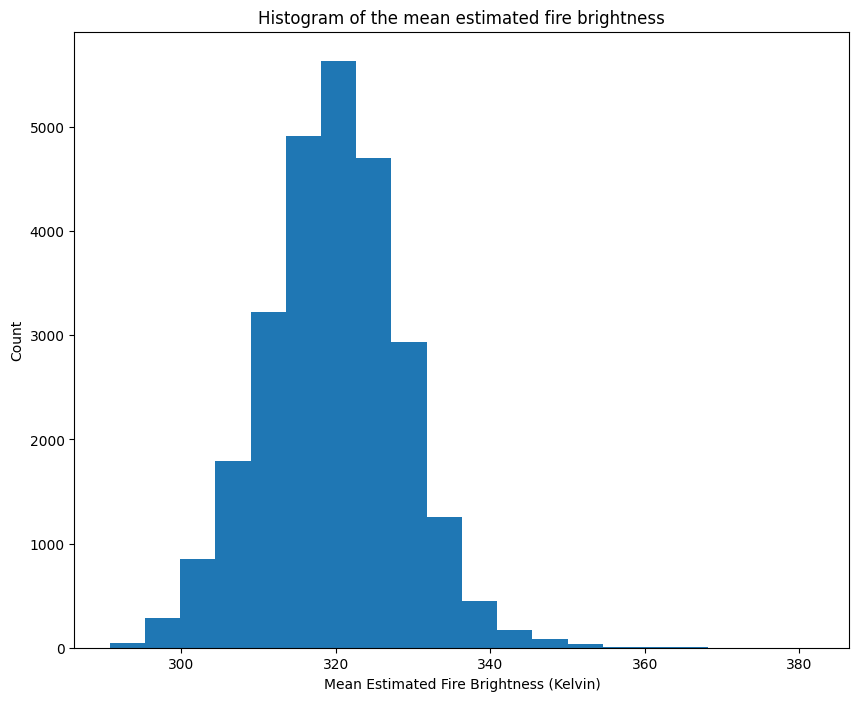

In [14]:
plt.figure(figsize=(10,8))
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.title('Histogram of the mean estimated fire brightness')
plt.ylabel('Count')
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')

plt.show()

### TASK 6: 

What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and  pass region as hue


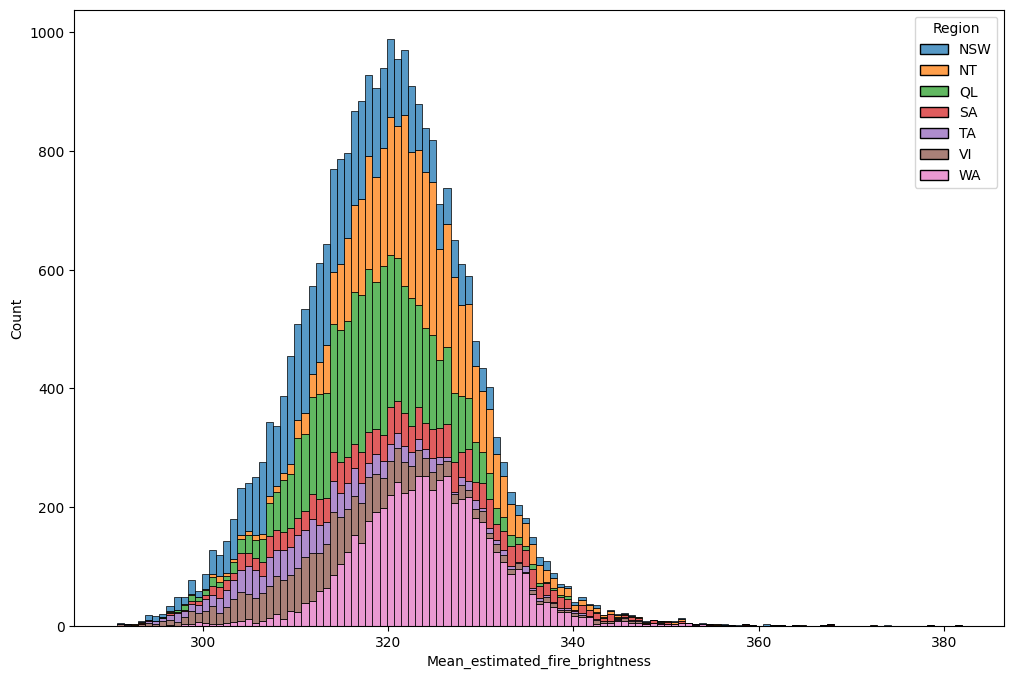

In [23]:
if df['Region'].dtype != 'object':
    df['Region'] = df['Region'].astype(str)
    
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

---


### TASK 7: 

Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level.


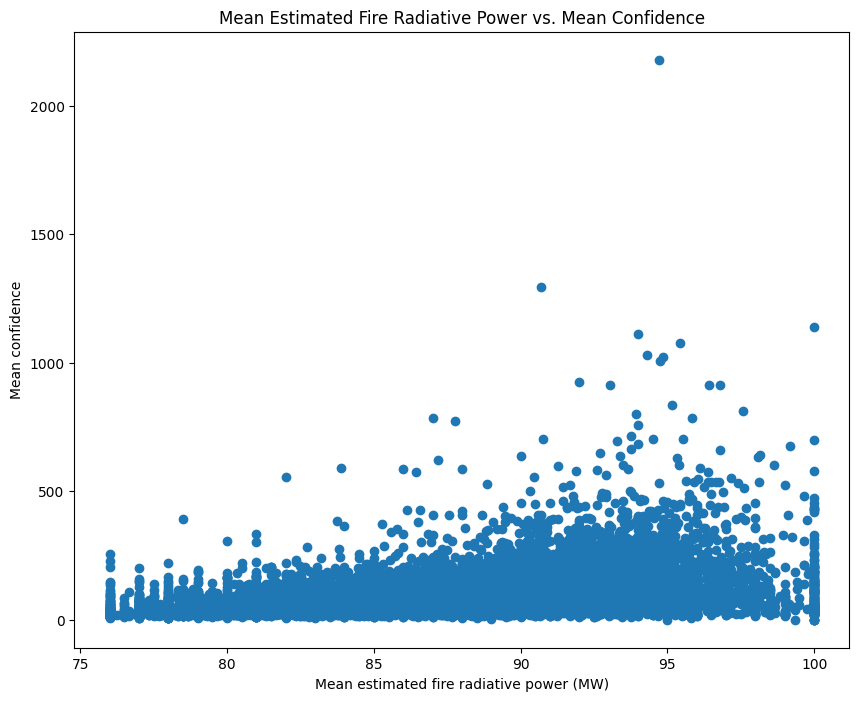

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(data=df, y='Mean_estimated_fire_radiative_power', x='Mean_confidence')

plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.xlabel('Mean estimated fire radiative power (MW)')
plt.ylabel('Mean confidence')

plt.show()

---


### TASK 8: 
Let's mark these seven regions on the Map of Australia using Folium
Lets also create a dataframe for you containing the regions, their latitudes and longitudes.


In [25]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [31]:
# Australia Map Geo Location
latitude = -25
longitude = 135

# instantiate a feature group 
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
aus_map = folium.Map(location=[latitude, longitude], zoom_start=5)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5,
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

#add incidents to map
aus_map.add_child(aus_reg)

---
